# IMPORT DATA


In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from utils import *

In [5]:
db = get_data_from_db()

In [6]:
# db = pd.read_csv("data.csv")
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


# Data Pre-visualization

Trouver les attributs liés pour une analyse ultérieure en utilisant la matrice de corrélation.


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  object 
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

# DATA CLEANING

1.  Check missing values and the skewness of the data
2.  Data pre-visualization


## 1. Data checking


In [8]:
# checking if there is any missing value
db.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [11]:
db.drop(
    [
        "type",
        "country",
        "language",
        "gender",
        "civilityTitle",
        "countryCode",
        "hasAnyApp",
        "hasAndroidApp",
        "hasIosApp",
        "hasProfilePicture",
    ],
    axis=1,
).skew()  # skew() function is used to check skewness in data

identifierHash           0.001134
socialNbFollowers        88.81691
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought           84.79736
civilityGenderId         -1.14082
daysSinceLastLogin      -1.675425
seniority                -0.42709
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: object

## 2. Data pre-visualiztion


Basic information of users


Text(0.5, 1.0, 'hasAnyApp Bins')

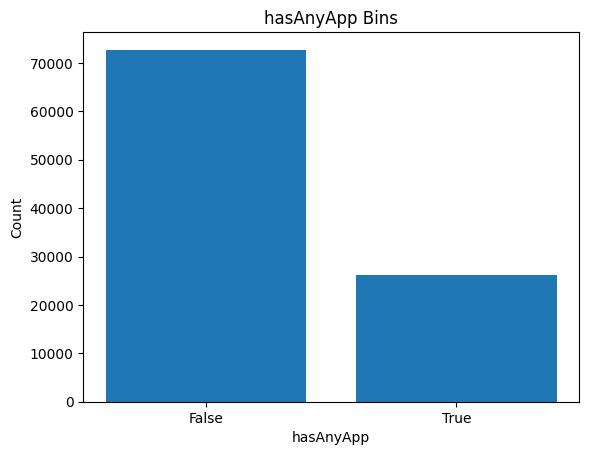

In [ ]:
import matplotlib as plt
from matplotlib import pyplot

group_names = ["False", "True"]
q = pyplot.bar(group_names, db["hasAnyApp"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("hasAnyApp")
plt.pyplot.ylabel("Count")
plt.pyplot.title("hasAnyApp Bins")

Most of the users did not use the mobile app


In [ ]:
df_group_two = db[["hasAnyApp", "productsBought", "productsSold"]]
df_group_two = df_group_two.groupby(["hasAnyApp"], as_index=False).agg(
    [np.sum, np.mean]
)
df_group_two

productsBought           productsSold          
                     sum      mean          sum      mean
hasAnyApp                                                
False               7957  0.109391         3233  0.044447
True                9049  0.345725         8794  0.335982

Users with mobile app have sightly higher buying power;
Buyers without mobile app tend to have slightly higher selling power


Text(0.5, 1.0, 'civilityTitle Bins')

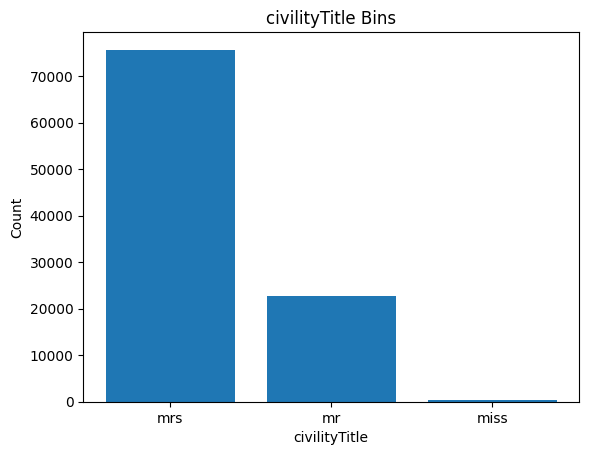

In [ ]:
import matplotlib as plt
from matplotlib import pyplot

group_names = ["mrs", "mr", "miss"]
pyplot.bar(group_names, height=db["civilityTitle"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("civilityTitle")
plt.pyplot.ylabel("Count")
plt.pyplot.title("civilityTitle Bins")

Married women seem to be the most active users on this site


In [ ]:
df_group_one = db[["civilityTitle", "productsBought", "productsSold"]]
df_group_one = df_group_one.groupby(["civilityTitle"], as_index=False).agg(
    [np.sum, np.mean]
)
df_group_one

productsBought           productsSold          
                         sum      mean          sum      mean
civilityTitle                                                
miss                     287  0.656751          574  1.313501
mr                      4262  0.186995         2673  0.117278
mrs                    12457  0.164592         8780  0.116009

Although single female is the smallest group of users, its buying power is the highest


Text(0.5, 1.0, 'language Bins')

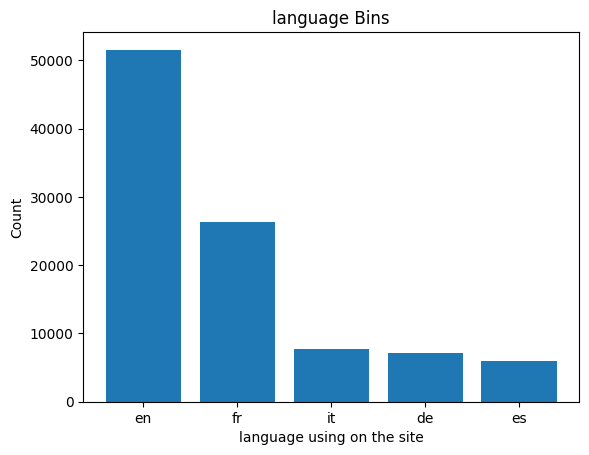

In [ ]:
group_names = ["en", "fr", "it", "de", "es"]
q = pyplot.bar(group_names, db["language"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("language using on the site")
plt.pyplot.ylabel("Count")
plt.pyplot.title("language Bins")

In [ ]:
df_group_three = db[["language", "productsBought", "productsSold"]]
df_group_three = df_group_three.groupby(["language"], as_index=False).agg(
    [np.sum, np.mean]
)
df_group_three

productsBought           productsSold          
                    sum      mean          sum      mean
language                                                
de                 1705  0.237531          539  0.075091
en                 8918  0.172950         4877  0.094581
es                  797  0.132107          901  0.149345
fr                 4386  0.166313         3004  0.113909
it                 1200  0.154520         2706  0.348442

Users' first prefer language is English, and the second one is French
However, they did not have the highest average productsBought and productsSold.


<Axes: xlabel='language', ylabel='count'>

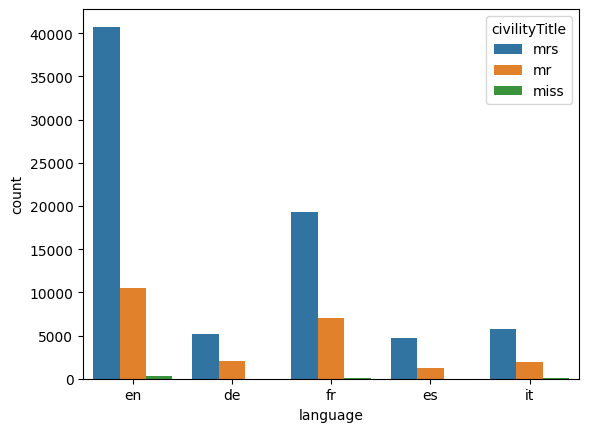

In [ ]:
import seaborn as sns

sns.countplot(x="language", data=db, hue="civilityTitle")

countplot tells us that there are more married females users globally.


# Segement the users

Determine the number of recommended clusters by using a dendogram:

1.  Remove redundant variable identifier hash: since this is unique for each row of data

    & variable type: since this remains the same for all data

    & variable country: since we could use the countryCode for analysis

    & variable gender & civilityTitle: since we could use civilityGenderId for analysis

2.  Encode string variable language, and countryCode; and boolean variables

3.  Draw the correlation matrix of filtered dataset

4.  Sample choosing for agglomerative dendogram drawing

5.  Define filter function


## 1. Remove variables


In [ ]:
repeat_columns = []
repeat_columns += ["identifierHash", "type", "country", "gender", "civilityTitle"]
db1 = db.drop(repeat_columns, axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,3,8,0,0,0,0.0,0,0,2,False,False,False,True,709,3205,106.83,8.9,us
1,de,3,8,0,0,0,0.0,0,0,2,False,False,False,True,709,3205,106.83,8.9,de
2,en,3,8,0,0,0,0.0,0,0,1,True,False,True,True,689,3205,106.83,8.9,se
3,en,3,8,0,0,0,0.0,0,0,2,False,False,False,True,709,3205,106.83,8.9,tr
4,en,3,8,0,0,0,0.0,0,0,1,True,False,True,True,709,3205,106.83,8.9,fr


## 2. Encode variables


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

string_columns = [
    "language",
    "countryCode",
    "hasAnyApp",
    "hasAndroidApp",
    "hasIosApp",
    "hasProfilePicture",
]

for var in string_columns:
    var_cat = db[[var]]
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + "_encoded"]
    db1 = db1.merge(var_cat_df, how="inner", left_index=True, right_index=True)

db2 = db1.drop(string_columns, axis=1)
db2.head()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   daysSinceLastLogin         98913 non-null  int64  
 10  seniority                  98913 non-null  int64  
 11  seniorityAsMonths          98913 non-null  float64
 12  seniorityAsYears           98913 non-null  float64
 13  language_encoded           98913 non-null  flo

## 3. Correlation matrix


Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

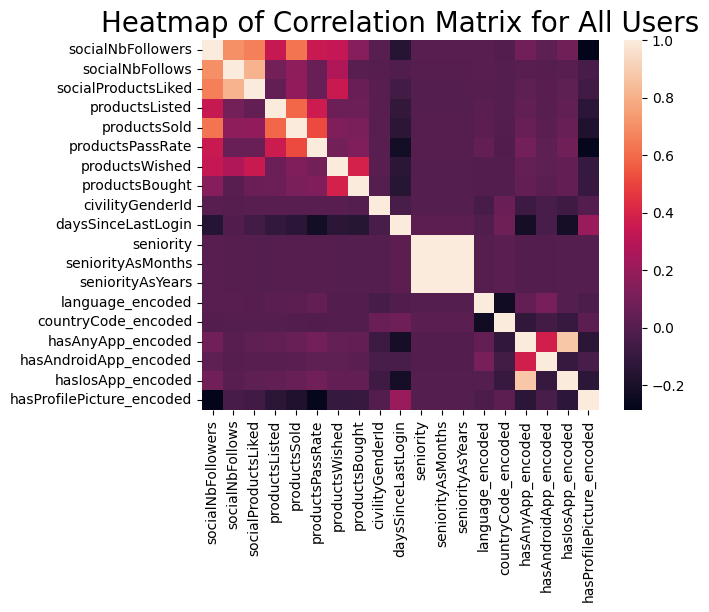

In [ ]:
import seaborn as sns

a = sns.heatmap(db2.corr())
a.set_title("Heatmap of Correlation Matrix for All Users", fontsize=20)

Les variables daysSinceLastLogin et hasProfilePicture semblent être négativement corrélées à toutes les autres variables. Cependant, seulement 1,95% des utilisateurs n'ont pas de photo de profil.

Les variables socialNbFollowers, socialNBFollows, socialproductsLiked, productsListed, productsSold, productsPassRate et productsWished semblent être positivement liées entre elles.

La variable seniority semble ne pas être corrélée avec toutes les autres variables.

Les variables language et country semblent être négativement corrélées et ont une faible corrélation avec la variable hasAnyApp & hasIosApp & hasAndroidApp; mais ont presque aucune corrélation avec d'autres variables. Pour l'instant, nous pourrions garder ces variables pour une analyse ultérieure.


In [ ]:
# remove variables with no correlations
no_columns = ["seniority", "seniorityAsMonths", "seniorityAsYears"]

db3 = db2.drop(no_columns, axis=1)

## 4. Sample choosing for dendogram

Since this dataset is too large for drawing dendrogram, we could choose 30% of the data randomly.


In [ ]:
print("Original dataset before filtering", db.shape)
print("Remainging data after filtering variables with no correlations:\n", db3.shape)
db_final = db3.sample(frac=0.3)
print("\n Final shrinking columns: \n", db_final.columns)
print("\n Final shrinking data: \n", db_final.shape)

Original dataset before filtering (98913, 24)
Remainging data after filtering variables with no correlations:
 (98913, 16)

 Final shrinking columns: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded'],
      dtype='object')

 Final shrinking data: 
 (29674, 16)


In [ ]:
# fig = plt.figure(figsize=(11, 8))
# dendogram = sch.dendrogram(sch.linkage(db_final, method="ward"))

Selon le graphique du dendrogramme, le nombre de clusters recommandés serait de deux. Nous pourrions donc segmenter les utilisateurs en deux groupes principaux (Actif/Inactif). Cependant, il semble également que nous regroupons les données en des clusters plus petits.


## 5. Define filter function


In [ ]:
# Total Users
print(f"Total users: {db3.shape[0]} records with {db3.shape[1]} columns")

# Inactive Users
Inactive_db = db3[
    helper_has_all_field_smaller_than(
        db3,
        [
            "socialProductsLiked",
            "productsListed",
            "productsPassRate",
            "productsWished",
            "productsListed",
            "productsSold",
            "productsBought",
        ],
        1,
    )
]
Inactive_db.dataframeName = "Inactive Users"
print(
    f"Inactive users: {Inactive_db.shape[0]} records with {Inactive_db.shape[1]} columns"
)

Active_db = db3[
    helper_has_any_field_greater_than(
        db3,
        [
            "socialProductsLiked",
            "productsListed",
            "productsPassRate",
            "productsWished",
            "productsListed",
            "productsSold",
            "productsBought",
        ],
        0,
    )
]
Inactive_db.dataframeName = "Active Users"
print(f"Active users: {Active_db.shape[0]} records with {Active_db.shape[1]} columns")

Total users: 98913 records with 16 columns
Inactive users: 77274 records with 16 columns
Active users: 21639 records with 16 columns


### Active Users


In [ ]:
# Utilisateurs réels ayant acheté ou vendu au moins une fois
Users_db = db3[
    helper_has_any_field_greater_than(db3, ["productsSold", "productsBought"], 0)
]
print(f"Actual Users: {Users_db.shape[0]} ")

# Utilisateurs réels actifs ayant une interaction sociale en dehors des transactions
AActive_db = Users_db[
    helper_has_any_field_greater_than(
        Users_db,
        ["socialProductsLiked", "productsListed", "productsPassRate", "productsWished"],
        0,
    )
]
AActive_db.dataframeName = "Active Actual Users"
print(f"Actal Active Users: {AActive_db.shape[0]}")
# Active_db.sample(12)

## Actual Buyers
buyers_db = db3[db3.productsBought > 0]
buyers_db.dataframeName = "Buyers"
print("Actual buyers: ", buyers_db.shape[0])


## Sellers
sellers_db = db3[(db3.productsListed > 0) | (db3.productsSold > 0)]
sellers_db.dataframeName = "Prospecting Sellers"
print("Prospecting sellers: ", sellers_db.shape[0])

### actual sellers (at least 1 product sold)
successful_sellers_db = db3[db3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Actual sellers: ", successful_sellers_db.shape[0])

# Utilisateurs sociaux sans transaction mais avec interaction sociale
# en regardant les données, nous pourrions facilement conclure que
# chaque nouveau compte se voit automatiquement attribuer 3 abonnés et 8 comptes à suivre.

social_db = db3[(db3["socialNbFollowers"] != 3) | (db3["socialNbFollows"] != 8)]
social_db1 = social_db[
    helper_has_all_field_smaller_than(social_db, ["productsSold", "productsBought"], 1)
]
# Parmi ces utilisateurs sociaux, ne filtrer que ceux qui sont actifs sur les produits.
market_social_db = social_db1[
    helper_has_any_field_greater_than(
        social_db1,
        ["socialProductsLiked", "productsListed", "productsPassRate", "productsWished"],
        0,
    )
]
print(f"Potential Social Users: {market_social_db.shape[0]}")

Actual Users: 6893 
Actal Active Users: 4894
Actual buyers:  5419
Prospecting sellers:  2719
Actual sellers:  2036
Potential Social Users: 3679


In [ ]:
print(
    f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:"""
)

Sbuyers_db = db3[db3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])
buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64

In [ ]:
Sbuyers_db.socialNbFollowers.describe()

count    1277.000000
mean        8.577917
std        10.768492
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       137.000000
Name: socialNbFollowers, dtype: float64

In [ ]:
print(
    f"""In average, actual sellers sell {successful_sellers_db.productsSold.sum() / successful_sellers_db.shape[0] :.2f} products. Details are as follows:"""
)
# successful sellers
Ssellers_db = db3[db3.productsSold >= 6]
Ssellers_db.dataframeName = "SSellers"
print("Accordingly, Successful sellers: ", Ssellers_db.shape[0])
successful_sellers_db.productsSold.describe()

In average, actual sellers sell 5.91 products. Details are as follows:
Accordingly, Successful sellers:  458


count    2036.000000
mean        5.907171
std        13.626529
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: productsSold, dtype: float64

Fidélisation de la clientèle :
70% des utilisateurs réels sont des utilisateurs actifs ayant une interaction sociale, ce sont les personnes que le site Web devrait valoriser le plus. Cela implique également que la connexion sociale entre les vendeurs et les acheteurs améliore la fidélité des utilisateurs.
3679 utilisateurs ont un fort potentiel pour se transformer en utilisateurs réels car ils ont une forte interaction sociale.


### Products

% de produits répondant à la description du produit. (Les produits vendus sont examinés par l'équipe du magasin avant d'être expédiés à l'acheteur.)
Ici, nous avons utilisé la variable productsPassRate, le pourcentage de produits répondant à la description du produit (L'équipe du magasin examine les produits vendus avant qu'ils ne soient expédiés à l'acheteur.) comme une mesure critique. Nous avons défini les vendeurs ayant un taux de réussite des produits supérieur ou égal à 90 % comme étant des vendeurs de la plus haute qualité, les vendeurs ayant un taux de réussite des produits supérieur ou égal à 80 % et inférieur à 90 % comme étant des vendeurs de qualité moyenne-élevée, les vendeurs ayant un taux de réussite des produits supérieur ou égal à 60 % et inférieur à 80 % comme étant des vendeurs standard en termes de qualité, et les vendeurs ayant un taux de réussite des produits inférieur à 60 % comme étant ceux avec une faible qualité.


In [ ]:
productsH_db = db3[db3.productsPassRate >= 90]
productsH_db.dataframeName = "Best quality's store"
print("Numbers of sellers with the highest quality: ", productsH_db.shape[0])

productsMh_db = db3[(db3.productsPassRate >= 80) & (db3.productsPassRate < 90)]
productsMh_db.dataframeName = "medium-high quality's store"
print("Numbers of sellers with the Medium-high quality: ", productsMh_db.shape[0])

productsS_db = db3[(db3.productsPassRate >= 60) & (db3.productsPassRate < 80)]
productsS_db.dataframeName = "Standard qualisty's store"
print("Numbers of sellers with the stadard quality: ", productsS_db.shape[0])

productsU_db = db3[(db3.productsPassRate < 60) & (db3.productsPassRate > 0)]
productsU_db.dataframeName = "Unqualified store"
print(
    "Numbers of sellers with low quality: ",
    productsU_db.shape[0]
    + (
        successful_sellers_db.shape[0]
        - productsH_db.shape[0]
        - productsMh_db.shape[0]
        - productsS_db.shape[0]
        - productsU_db.shape[0]
    ),
)

Numbers of sellers with the highest quality:  539
Numbers of sellers with the Medium-high quality:  129
Numbers of sellers with the stadard quality:  174
Numbers of sellers with low quality:  1194


In [ ]:
print(
    f"""In average, active low quality sellers sell {productsU_db.productsSold.sum() / sellers_db.shape[0] :.2f} """
)
print(
    f"""In average, active standard quality sellers sell {productsS_db.productsSold.sum() / sellers_db.shape[0] :.2f} """
)
print(
    f"""In average, active medium-high quality sellers sell {productsMh_db.productsSold.sum() / sellers_db.shape[0] :.2f} """
)
print(
    f"""In average, active high quality sellers sell {productsH_db.productsSold.sum() / sellers_db.shape[0] :.2f} products. Details are as follows:"""
)
productsH_db.productsSold.describe()

In average, active low quality sellers sell 0.24 
In average, active standard quality sellers sell 0.60 
In average, active medium-high quality sellers sell 0.77 
In average, active high quality sellers sell 2.31 products. Details are as follows:


count    539.000000
mean      11.653061
std       20.687448
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      170.000000
Name: productsSold, dtype: float64

Plus le taux de réussite des produits est élevé, plus la chance que le magasin obtienne une vente élevée est grande. Cela implique également que la réglementation du magasin sur les produits passants est bonne.
Nous avons calculé la moyenne des produits vendus pour les vendeurs ayant une qualité de produit différente. Nous pouvons conclure que plus le taux de réussite des produits est élevé, plus la chance que le magasin obtienne une vente élevée est grande. Cela implique également que la réglementation du site sur les produits passants est suffisamment bonne pour que les acheteurs soient satisfaits du produit passé par le site.
